In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy as np
import os

In [12]:
# resets the dictionaries
trials = {}
mets = {}

In [13]:
# # reads in motion data to dictionary
def mot_reader(trial):
    for files in os.walk('C:/Users/rosha/OneDrive/Documents/WEAV_joint/WEAV-Joint-Range-Of-Motion/OpenSimData/Kinematics'):
        for file in files[2]:
            if trial in file:
                name = file.replace('.mot', '')
                trials["{0}".format(name)] = pd.read_csv('C:/Users/rosha/OneDrive/Documents/WEAV_joint/WEAV-Joint-Range-Of-Motion/OpenSimData/Kinematics/{}'.format(file), skiprows = 10, sep = '\t')

mot_reader('s003')
mot_reader('s004')
mot_reader('s005')
mot_reader('s006')

In [14]:
# reads in trial data from dictionary
def mags(trial_name):
  trial = []
  for key in trials.keys():
    if trial_name in key:
      trial.append(trials[key])
  # calculates magnitude of lumbar for trial
  def lum_mag(trial):
    avg_mags = []
    avg_rhythms = []
    for sub in trial:
      peaks = find_peaks(sub['lumbar_rotation'], np.nanmean(sub['lumbar_rotation']), distance = 40)
      run = 0
      mag = []
      rhythm = []
      for pt in (peaks[0])[0:-1]:
        period_end = peaks[0].item(run + 1)
        period_start = peaks[0].item(run)
        rhythm.append(period_end - period_start)
        valley = min(((sub)['lumbar_rotation'])[period_start:period_end])
        peak = ((sub)['lumbar_rotation'][period_end])
        mag.append(peak - valley)
        run += 1
      avg_mags.append(sum(mag) / len(mag))
      avg_rhythms.append(sum(rhythm) / len(rhythm))
    trial_mag = sum(avg_mags) / len(avg_mags)
    ryvar = sum(avg_rhythms) / len(avg_rhythms)
    trial_rhythm = ryvar / 60
    results = [trial_mag, trial_rhythm]
    return results
  # calculates magnitude of right arm flex for trial
  def raf_mag(trial):
    avg_mags = []
    avg_rhythms = []
    for sub in trial:
      peaks = find_peaks(sub['arm_flex_r'], np.nanmean(sub['arm_flex_r']), distance = 40)
      run = 0
      mag = []
      rhythm = []
      for pt in (peaks[0])[0:-1]:
        period_end = peaks[0].item(run + 1)
        period_start = peaks[0].item(run)
        rhythm.append(period_end - period_start)
        valley = min(((sub)['arm_flex_r'])[period_start:period_end])
        peak = ((sub)['arm_flex_r'][period_end])
        mag.append(peak - valley)
        run += 1
      avg_mags.append(sum(mag) / len(mag))
      avg_rhythms.append(sum(rhythm) / len(rhythm))
    trial_mag = sum(avg_mags) / len(avg_mags)
    ryvar = sum(avg_rhythms) / len(avg_rhythms)
    trial_rhythm = ryvar / 60
    results = [trial_mag, trial_rhythm]
    return results
  # calculates magnitude of left arm flex for trial
  def laf_mag(trial):
    avg_mags = []
    avg_rhythms = []
    for sub in trial:
      peaks = find_peaks(sub['arm_flex_l'], np.nanmean(sub['arm_flex_l']), distance = 40)
      run = 0
      mag = []
      rhythm = []
      for pt in (peaks[0])[0:-1]:
        period_end = peaks[0].item(run + 1)
        period_start = peaks[0].item(run)
        rhythm.append(period_end - period_start)
        valley = min(((sub)['arm_flex_l'])[period_start:period_end])
        peak = ((sub)['arm_flex_l'][period_end])
        mag.append(peak - valley)
        run += 1
      avg_mags.append(sum(mag) / len(mag))
      avg_rhythms.append(sum(rhythm) / len(rhythm))
    trial_mag = sum(avg_mags) / len(avg_mags)
    ryvar = sum(avg_rhythms) / len(avg_rhythms)
    trial_rhythm = ryvar / 60
    results = [trial_mag, trial_rhythm]
    return results
  # calculates magnitude of right elbow flex for trial
  def ref_mag(trial):
    avg_mags = []
    avg_rhythms = []
    for sub in trial:
      peaks = find_peaks(sub['elbow_flex_r'], np.nanmean(sub['elbow_flex_r']), distance = 40)
      run = 0
      mag = []
      rhythm = []
      for pt in (peaks[0])[0:-1]:
        period_end = peaks[0].item(run + 1)
        period_start = peaks[0].item(run)
        rhythm.append(period_end - period_start)
        valley = min(((sub)['elbow_flex_r'])[period_start:period_end])
        peak = ((sub)['elbow_flex_r'][period_end])
        mag.append(peak - valley)
        run += 1
      avg_mags.append(sum(mag) / len(mag))
      avg_rhythms.append(sum(rhythm) / len(rhythm))
    trial_mag = sum(avg_mags) / len(avg_mags)
    ryvar = sum(avg_rhythms) / len(avg_rhythms)
    trial_rhythm = ryvar / 60
    results = [trial_mag, trial_rhythm]
    return results
  # calculates magnitude of left elbow flex for trial
  def lef_mag(trial):
    avg_mags = []
    avg_rhythms = []
    for sub in trial:
      peaks = find_peaks(sub['elbow_flex_l'], np.nanmean(sub['elbow_flex_l']), distance = 40)
      run = 0
      mag = []
      rhythm = []
      for pt in (peaks[0])[0:-1]:
        period_end = peaks[0].item(run + 1)
        period_start = peaks[0].item(run)
        rhythm.append(period_end - period_start)
        valley = min(((sub)['elbow_flex_l'])[period_start:period_end])
        peak = ((sub)['elbow_flex_l'][period_end])
        mag.append(peak - valley)
        run += 1
      avg_mags.append(sum(mag) / len(mag))
      avg_rhythms.append(sum(rhythm) / len(rhythm))
    trial_mag = sum(avg_mags) / len(avg_mags)
    ryvar = sum(avg_rhythms) / len(avg_rhythms)
    trial_rhythm = ryvar / 60
    results = [trial_mag, trial_rhythm]
    return results
  final_trial_mags = {
      "Lumbar": (lum_mag(trial)),
      "Right Arm": (raf_mag(trial)),
      "Left Arm": (laf_mag(trial)),
      "Right Elbow": (ref_mag(trial)),
      "Left Elbow": (lef_mag(trial))
  }
  return final_trial_mags

flat_10_s003_val = mags('Flat_10_s003')
up_10_s003_val = mags('Up_10_s003')
down_10_s003_val = mags('Down_10_s003')
flat_08_s003_val = mags('Flat_08_s003')
flat_12_s003_val = mags('Flat_12_s003')

flat_10_s004_val = mags('Flat_10_s004')
up_10_s004_val = mags('Up_10_s004')
down_10_s004_val = mags('Down_10_s004')
flat_08_s004_val = mags('Flat_08_s004')
flat_12_s004_val = mags('Flat_12_s004')

flat_10_s005_val = mags('Flat_10_s005')
up_10_s005_val = mags('Up_10_s005')
down_10_s005_val = mags('Down_10_s005')
flat_08_s005_val = mags('Flat_08_s005')
flat_12_s005_val = mags('Flat_12_s005')

flat_10_s006_val = mags('Flat_10_s006')
up_10_s006_val = mags('Up_10_s006')
down_10_s006_val = mags('Down_10_s006')
flat_08_s006_val = mags('Flat_08_s006')
flat_12_s006_val = mags('Flat_12_s006')

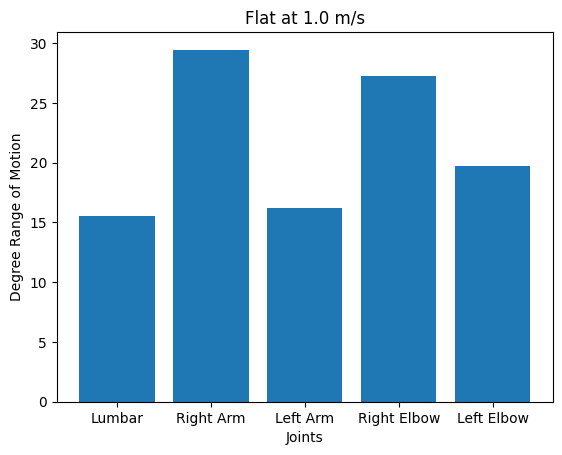

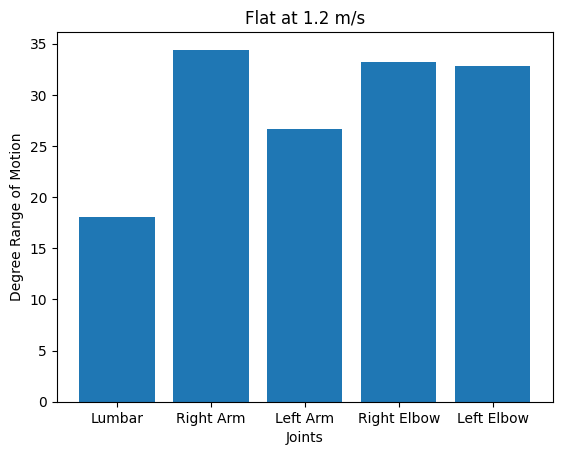

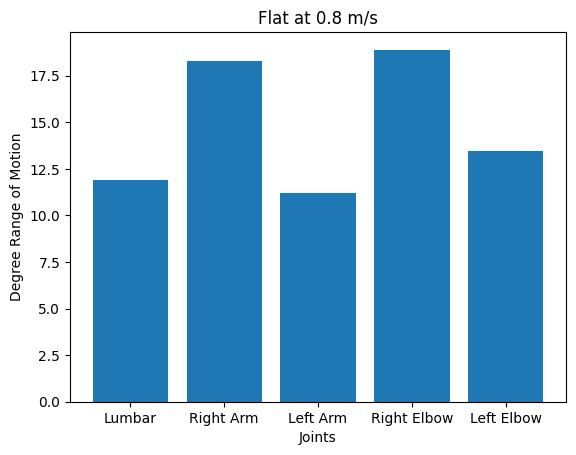

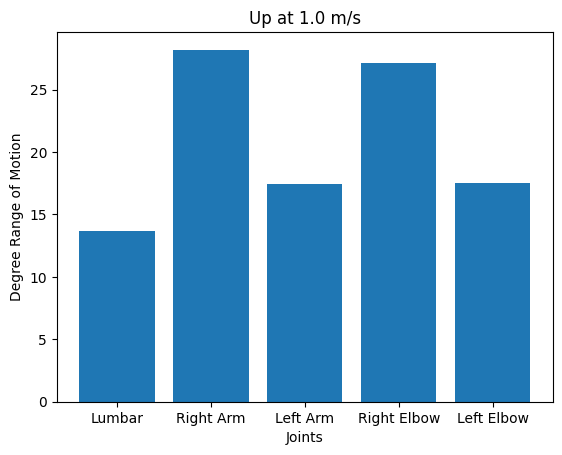

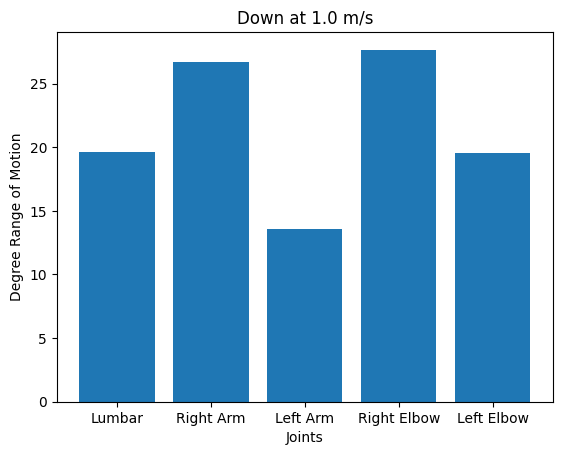

In [15]:
joints = list(flat_10_s006_val.keys())
mags = []

for item in range(5):
  mags.append(list(flat_10_s006_val.values())[item][0])

plt.bar(joints, mags)
plt.xlabel('Joints')
plt.ylabel('Degree Range of Motion')
plt.title('Flat at 1.0 m/s')
plt.show()

joints = list(flat_12_s006_val.keys())
mags = []

for item in range(5):
  mags.append(list(flat_12_s006_val.values())[item][0])

plt.bar(joints, mags)
plt.xlabel('Joints')
plt.ylabel('Degree Range of Motion')
plt.title('Flat at 1.2 m/s')
plt.show()

joints = list(flat_08_s006_val.keys())
mags = []

for item in range(5):
  mags.append(list(flat_08_s006_val.values())[item][0])

plt.bar(joints, mags)
plt.xlabel('Joints')
plt.ylabel('Degree Range of Motion')
plt.title('Flat at 0.8 m/s')
plt.show()

joints = list(up_10_s006_val.keys())
mags = []

for item in range(5):
  mags.append(list(up_10_s006_val.values())[item][0])

plt.bar(joints, mags)
plt.xlabel('Joints')
plt.ylabel('Degree Range of Motion')
plt.title('Up at 1.0 m/s')
plt.show()

joints = list(down_10_s006_val.keys())
mags = []

for item in range(5):
  mags.append(list(down_10_s006_val.values())[item][0])

plt.bar(joints, mags)
plt.xlabel('Joints')
plt.ylabel('Degree Range of Motion')
plt.title('Down at 1.0 m/s')
plt.show()

In [10]:
joints = list(flat_10_s003_val.keys())

def plotter(trial):
  # finish this function

[[13.672601223665946, 1.0779446749238415],
 [28.19079335164935, 1.0717775974025974],
 [17.430128131057238, 1.0742760942760943],
 [27.088487115019575, 1.0717718855218856],
 [17.546960811680556, 1.0710834034792367]]

In [6]:
def read_met(trial):
    for files in os.walk('C:/Users/rosha/OneDrive/Documents/WEAV_joint/WEAV-Joint-Range-Of-Motion/OpenSimData/Metabolics'):
        for file in files[2]:
            if trial in file:
                name = file.replace('.csv', '')
                mets["{0}".format(name)] = pd.read_csv('C:/Users/rosha/OneDrive/Documents/WEAV_joint/WEAV-Joint-Range-Of-Motion/OpenSimData/Metabolics/{}'.format(file))

read_met('s003')
read_met('s004')
read_met('s005')
read_met('s006')

In [7]:
print(mets['cpet_s005'])

             ID1 Unnamed: 1  Unnamed: 2          Test date 11/14/2022  \
0      Last Name          5         NaN          Test Time    2:54 PM   
1     First Name       WEAV         NaN      Test Duration      37:51   
2         Gender     Female         NaN  Exercise Duration      00:00   
3            Age         22         NaN       Subject Type    Healthy   
4    Height (cm)        151         NaN          Test Type     Submax   
..           ...        ...         ...                ...        ...   
843          NaN        NaN         NaN                NaN        NaN   
844          NaN        NaN         NaN                NaN        NaN   
845          NaN        NaN         NaN                NaN        NaN   
846          NaN        NaN         NaN                NaN        NaN   
847          NaN        NaN         NaN                NaN        NaN   

     Unnamed: 5       Barometric Pressure (mmHg)    759  Unnamed: 8      t  \
0           NaN         Ambient Temperature (